In [1]:
import json
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_colwidth')
pd.set_option('display.max_colwidth', 100)

## Task 1: Extract insights from data (15%)

In [49]:
data_name = Path('Oppositional_thinking_analysis_dataset')
data_path = Path('data') / data_name.with_suffix(".json")
assert data_path.exists, "File doesn't exist!"

In [50]:
# read file
with open(data_path, 'r', encoding='utf-8') as file:
    data = json.load(file)
df = pd.json_normalize(data)
display(df.head())

,id,text,category,annotations,spacy_tokens
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,[{'span_text': 'Australian Senator Malcolm Rob...,WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,[{'span_text': 'I ’m deeply concerned that the...,WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,"[{'span_text': 'someone who died suddenly', 'c...",WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,"[{'span_text': 'brutal Chinese lockdowns', 'ca...",WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,[{'span_text': 'death from Wuhan coronavirus (...,WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...


In [55]:
# extract information of annotations and tokens
annotations_expanded = df.explode('annotations')
annotations_df = pd.json_normalize(annotations_expanded['annotations'])
display(annotations_df.head())

,span_text,category,annotator,start_char,end_char,start_spacy_token,end_spacy_token
0,Australian Senator Malcolm Roberts,CAMPAIGNER,gold_label,16,50,3,7
1,the first politician,CAMPAIGNER,gold_label,135,155,24,27
2,I ’m deeply concerned that the push to vaccinate these children is nothing more than a dystopian...,NEGATIVE_EFFECT,gold_label,2,135,1,22
3,to vaccinate these children,OBJECTIVE,gold_label,38,65,8,12
4,these children,VICTIM,gold_label,51,65,10,12


In [59]:
annotation_category_counts = annotations_df['category'].value_counts()
display(pd.DataFrame(annotation_category_counts).transpose())

category,CAMPAIGNER,AGENT,NEGATIVE_EFFECT,VICTIM,FACILITATOR,OBJECTIVE,X
count,5096,5082,4387,3517,2763,1602,206


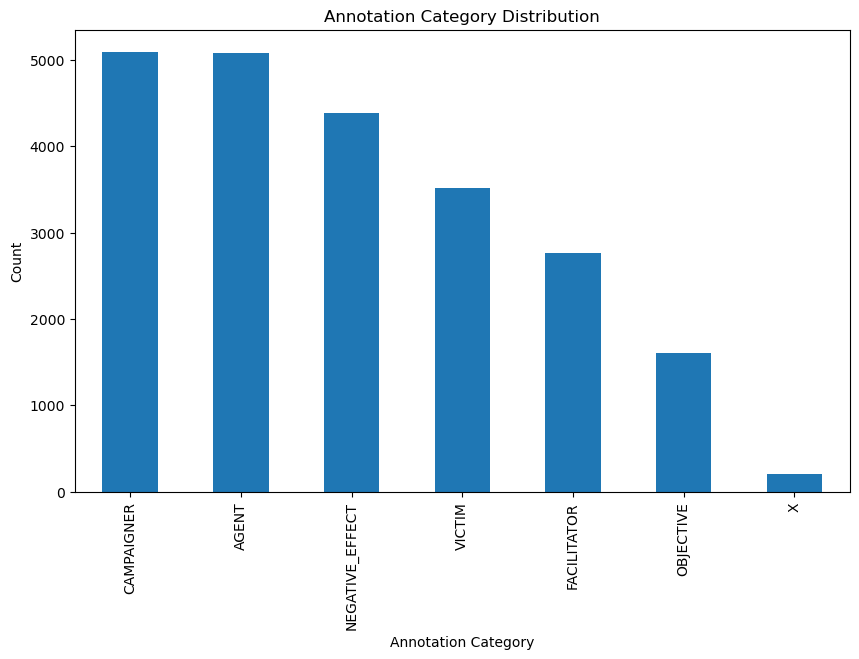

In [60]:
plt.figure(figsize=(10, 6))
annotation_category_counts.plot(kind='bar')
plt.title('Annotation Category Distribution')
plt.xlabel('Annotation Category')
plt.ylabel('Count')
plt.show()

In [61]:
category_text_counts = annotations_df.groupby('category')['span_text'].apply(lambda x: Counter(x).most_common(5))
display(pd.DataFrame(category_text_counts).transpose())

category,AGENT,CAMPAIGNER,FACILITATOR,NEGATIVE_EFFECT,OBJECTIVE,VICTIM,X
span_text,"[(Pfizer, 244), (Big Pharma, 82), (the WHO, 75), (Bill Gates, 73), (Moderna, 72)]","[(summit, 256), (Trump, 86), (dailyveracity, 84), (donna, 78), (saveusnow, 59)]","[(the media, 52), (Ukraine, 24), (Twitter, 22), (YouTube, 20), (the mainstream media, 16)]","[(is being turned into the Internet of bodies, 19), (was injected with the C 19 biological chemi...","[(GenocideAgenda, 12), (the Great Reset, 9), (population control, 6), (the New World Order, 5), ...","[(people, 129), (children, 100), (humanity, 46), (The human race, 34), (Children, 33)]",[(EXIT COVID - NEXT - RUSSIA IS BAD NARRATIVE - MSM IS FAKE NEWS - MSM IS - ENNEMY OF THE PEOPLE...


In [63]:
nlp = spacy.load("en_core_web_sm")

NameError: name 'spacy' is not defined

In [25]:
df_anal = df
df_anal['text_length'] = df_anal['text'].apply(len)
display(df.head())

,id,text,category,annotations,spacy_tokens,text_length
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,[{'span_text': 'Australian Senator Malcolm Rob...,WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...,218
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,[{'span_text': 'I ’m deeply concerned that the...,WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...,294
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,"[{'span_text': 'someone who died suddenly', 'c...",WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...,198
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,"[{'span_text': 'brutal Chinese lockdowns', 'ca...",WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...,326
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,[{'span_text': 'death from Wuhan coronavirus (...,WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...,698


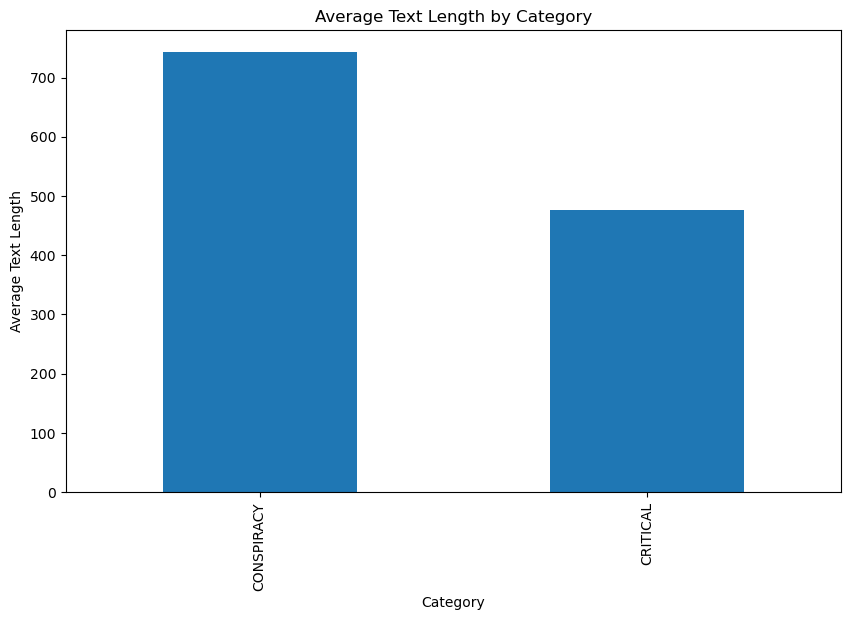

In [26]:
plt.figure(figsize=(10, 6))
df.groupby('category')['text_length'].mean().plot(kind='bar')
plt.title('Average Text Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Text Length')
plt.show()

In [11]:
for instance in data:
    category = instance['category']
    text = instance['text']
    words = text.split()
    
    # 记录文本长度
    category_text_lengths[category].append(len(words))

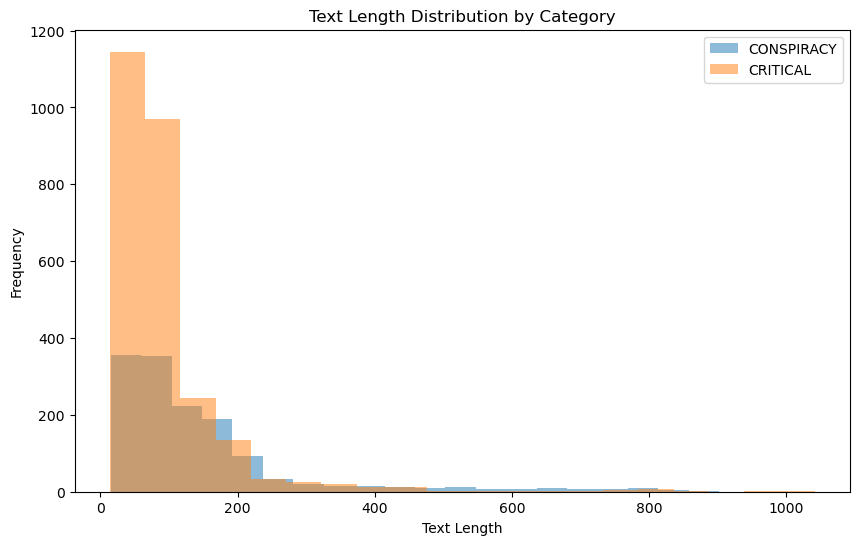

In [12]:
plt.figure(figsize=(10, 6))
for category, lengths in category_text_lengths.items():
    plt.hist(lengths, bins=20, alpha=0.5, label=category)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Text Length Distribution by Category')
plt.show()

In [ ]:

# 初始化字典
category_text_lengths = defaultdict(list)
unique_words_by_category = defaultdict(set)
unique_words_overall = set()

# 解析每个实例


# 比较不同类别中的文本长度

# 计算每个类别中的唯一词数
unique_words_count_by_category = {category: len(words) for category, words in unique_words_by_category.items()}

# 计算整个数据集中的唯一词数
unique_words_count_overall = len(unique_words_overall)

print("Number of unique words in each category:")
for category, count in unique_words_count_by_category.items():
    print(f"{category}: {count}")

print(f"Number of unique words in the whole dataset: {unique_words_count_overall}")
